In [0]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#train.head(3)

In [0]:
train = train.rename(columns={'賃料':'Rent', '契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})
test = test.rename(columns={'契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})

In [472]:
train.shape, test.shape

((31470, 17), (31262, 16))

In [473]:
train.head(3)


id    Rent     Location                                             Access  \
0   1   75000  東京都北区滝野川３丁目  都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...   
1   2   76000  東京都中央区月島３丁目  都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...   
2   3  110000  東京都渋谷区笹塚２丁目  京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...   

  Type      Age Direction     Area     Floor  \
0   1K    9年9ヶ月        南東  20.01m2   1階／12階建   
1   1R  44年10ヶ月       NaN   16.5m2   5階／10階建   
2   1K    8年6ヶ月         南  22.05m2  12階／15階建   

                                                Bath  \
0   専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座   
1                              専用トイレ／\tシャワー／\t温水洗浄便座   
2  専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...   

                           Kitchen                              Internet  \
0  ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯    インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ   
1          ガスコンロ／\tシステムキッチン\t／\t給湯                             インターネット対応   
2  ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯  インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ   

                                            Facility  \
0  エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...   
1  エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...   
2  エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...   

                                             Parking  \
0                                            駐輪場\t空有   
1                         駐輪場\t空有\t駐車場\t無\tバイク置き場\t無   
2  駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m   

                                            Surround      Material Contract  
0  【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...  RC（鉄筋コンクリート）      2年間  
1                                       【スーパー】 1283m           鉄骨造      2年間  
2  【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m  RC（鉄筋コンクリート）      2年間

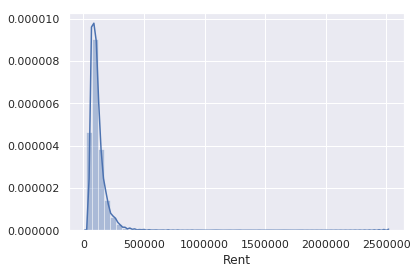

In [474]:
#train['Rent']=np.log1p(train['Rent'])
sns.distplot(train['Rent'])
plt.show()


In [0]:
#corrmat = train.corr()
#f, ax = plt.subplots(figsize=(10, 10))
#sns.heatmap(corrmat, vmax=0.8, annot=True);
#train_test_data = pd.concat([train, test], sort=False).reset_index(drop=True)

In [0]:
train = train.drop([5775,20926],axis = 0)

## 1. Location

In [0]:
train_test_data = [train, test]# combining train and test dataset
for dataset in train_test_data:
    dataset['City'] = dataset['Location'].str.extract('(千代田区|中央区|港区|新宿区|文京区|'
                                                 '台東区|墨田区|江東区|品川区|目黒区|'
                                                 '大田区|世田谷区|渋谷区|中野区|杉並区|'
                                                 '豊島区|北区|荒川区|板橋区|練馬区|足立区|葛飾区|江戸川区)')

In [478]:
train[['City', 'Rent']].groupby(['City'], as_index=False).mean().sort_values(by="Rent",ascending=False)


City           Rent
16    港区  213407.354497
4   千代田区  182706.236324
1    中央区  180887.865520
15   渋谷区  171839.786802
17   目黒区  145674.389052
10   新宿区  130573.957482
9    文京区  128562.070628
5    台東区  127625.944206
14   江東区  126217.110743
6    品川区  124609.473270
19   荒川区  116819.304348
7    墨田区  116201.346535
0   世田谷区  113781.270261
21   豊島区  110916.884343
8    大田区  106981.675000
2    中野区  101578.398018
3     北区   99506.602871
11   杉並区   97708.174675
18   練馬区   92724.943493
12   板橋区   90003.879310
13  江戸川区   86592.302585
22   足立区   85872.540849
20   葛飾区   79114.657591

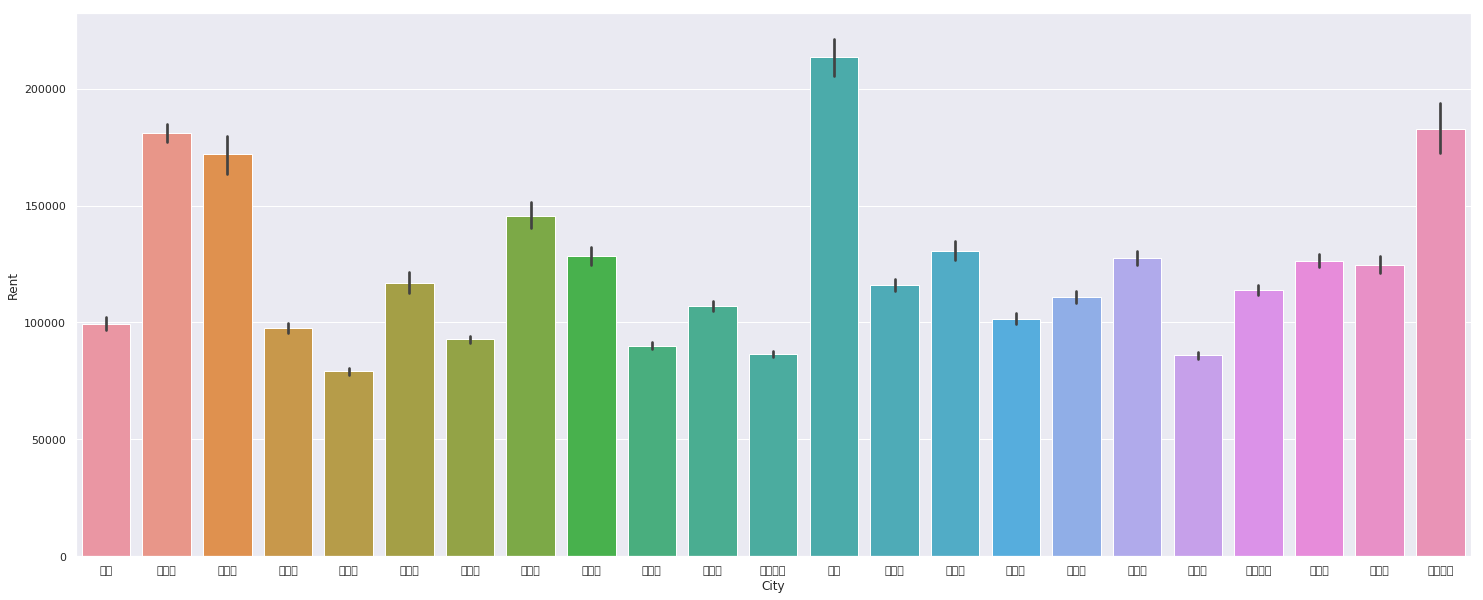

In [479]:
sns.set(font='IPAexGothic')
plt.figure(figsize=(25,10))
sns.barplot(x=train['City'],y=train['Rent'],data=train)

## 2. Access

In [0]:
for dataset in train_test_data:
    dataset['Station'] = dataset['Access'].str.extract('([\u4E00-\u9FAF|\u3040-\u3096|\u30A1-\u30FA|\uFF66-\uFF9D|\u31F0-\u31FF]*)駅')
    dataset['Line'] = dataset['Access'].str.extract('([\u4E00-\u9FAF|\u3040-\u3096|\u30A1-\u30FA|\uFF66-\uFF9D|\u31F0-\u31FF]*)線').fillna('山手	')
    dataset['MinWalk'] = dataset['Access'].str.extract('((?<=徒歩).+?(?=分))').fillna('0').astype(int)
    dataset['MinBus'] = dataset['Access'].str.extract('((?<=バス\().+?(?=分\)))').fillna('0').astype(int)

In [0]:
for dataset in train_test_data:
    dataset['StationCount'] = dataset['Access'].map(lambda x: x.count('駅'))
    dataset['LineCount'] = dataset['Access'].map(lambda x: x.count('線'))

In [482]:
train[['id','StationCount','LineCount']].groupby(['id','StationCount'],as_index=False).mean().head(5)

id  StationCount  LineCount
0   1             3          3
1   2             3          3
2   3             3          3
3   4             3          4
4   5             3          3

In [483]:
train[['Station','Rent']].groupby(['Station'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

Station           Rent
384   青山一丁目  547000.000000
333     虎ノ門  420000.000000
242     永田町  407500.000000
405      麹町  405000.000000
40      乃木坂  342543.478261
112     外苑前  325166.666667
93      半蔵門  317621.621622
294     神谷町  305547.619048
62      代官山  294111.111111
244      汐留  282538.461538

In [484]:
train[['Line','Rent']].groupby(['Line'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

Line           Rent
28   東北新幹  212000.000000
0    りんかい  194802.631579
56     銀座  189117.097625
46    総武本  167023.502304
19     南北  160161.913897
26    日比谷  157645.281955
52  都営大江戸  153072.305097
23     山手  150170.196380
27    有楽町  149743.818100
33   東急東横  143593.856767

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


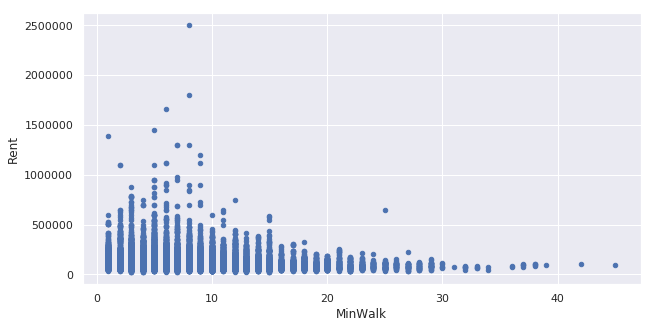

In [485]:
train.plot.scatter(
    x="MinWalk", 
    y="Rent", 
    figsize = (10, 5)
)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


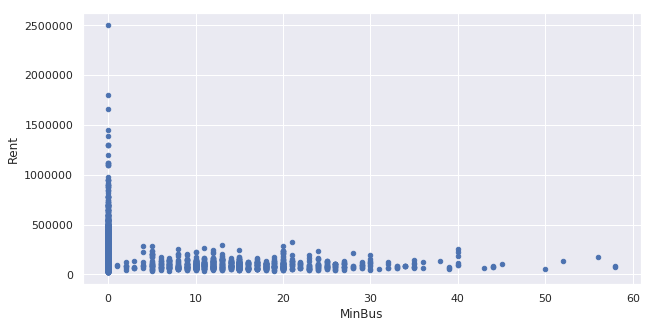

In [486]:
train.plot.scatter(
    x="MinBus", 
    y="Rent", 
    figsize = (10, 5)
)

## 3. Type

In [0]:
for dataset in train_test_data:
    dataset['R'] = dataset['Type'].str.extract('([0-9])').fillna('2').astype(int)
    dataset['K'] = dataset['Type'].str.extract('(K)')
    dataset['L'] = dataset['Type'].str.extract('(L)')
    dataset['D'] = dataset['Type'].str.extract('(D)')
    dataset['S'] = dataset['Type'].str.extract('(S)')


In [0]:
for dataset in train_test_data:
    dataset['K'] = dataset['K'].apply(lambda x: 1 if x == 'K' else 0)
    dataset['D'] = dataset['D'].apply(lambda x: 1 if x == 'D' else 0)
    dataset['L'] = dataset['L'].apply(lambda x: 1 if x == 'L' else 0)
    dataset['S'] = dataset['S'].apply(lambda x: 1 if x == 'S' else 0)


In [489]:
train[['id','R','K','D','L','S']].groupby(['id','R'],as_index=False).mean().head(5)

id  R  K  D  L  S
0   1  1  1  0  0  0
1   2  1  0  0  0  0
2   3  1  1  0  0  0
3   4  2  1  1  1  0
4   5  2  1  1  0  0

## 4. Age

In [0]:
 for dataset in train_test_data:
    dataset['NewConstr'] = (dataset['Age']=='新築')
    dataset['Year'] = dataset['Age'].str.extract('([0-9]*年)')
    dataset['Year'] = dataset['Year'].str.extract('([0-9]*)').fillna('0').astype(int)
    dataset['Month'] = dataset['Age'].str.extract('([0-9]*ヶ月)')
    dataset['Month'] = dataset['Month'].str.extract('([0-9]*)').fillna('0').astype(int)
    dataset['Month'] = dataset['Year']*12+dataset['Month']
    

## 5. Direction

In [0]:
for dataset in train_test_data:
    dataset['Direction'].fillna('南',inplace=True)

In [492]:
train[['Direction', 'Rent']].groupby(['Direction'], as_index=False).mean()

Direction           Rent
0         北  126057.842319
1        北東  127517.737320
2        北西  134986.058113
3         南  110610.190084
4        南東  131210.768238
5        南西  126737.894481
6         東  113991.111311
7         西  116873.638509

## 6. Area

In [0]:
for dataset in train_test_data:
    dataset['Area'] = dataset['Area'].str.extract('(-?\d+\.?\d*)').astype(float)


In [494]:
train[['Area', 'Rent']].groupby(['Area'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

Area       Rent
5729  217.29  2500000.0
5702  151.81  1800000.0
5737  341.30  1660000.0
5733  232.01  1450000.0
5680  138.99  1390000.0
5714  167.99  1300000.0
5659  125.00  1300000.0
5731  223.71  1300000.0
5709  163.62  1200000.0
5730  221.30  1120000.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


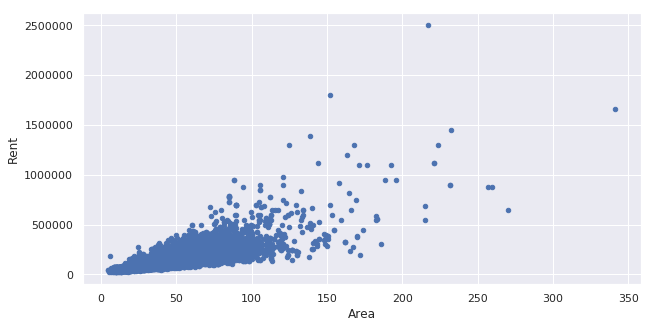

In [495]:
train.plot.scatter(
    x="Area", 
    y="Rent", 
    figsize = (10, 5)
)

## 7. Floor

In [0]:
for dataset in train_test_data:
    dataset['FloorTh'] = dataset['Floor'].str.extract(r'(\d+)?階\W', expand=False).fillna('0').astype(int)
    dataset['FloorNum'] = dataset['Floor'].str.extract(r'(\d+)?階建', expand=False).fillna('0').astype(int)
    dataset['UndergroundTh'] = dataset['Floor'].str.extract(r'^地下(\d+)?階', expand=False).fillna('0').astype(int)
    dataset['UndergroundNum'] = dataset['Floor'].str.extract(r'（地下(\d+)?階）', expand=False).fillna('0').astype(int)
    dataset['House'] = dataset['Floor'].str.match('((?!/)^.\d*階建)')

## 8. Bath

In [0]:
for dataset in train_test_data:
    dataset['warmseat'] = dataset['Bath'].str.extract('(温水洗浄便座)')
    dataset['shower'] = dataset['Bath'].str.extract('(シャワー)')
    dataset['dryer'] = dataset['Bath'].str.extract('(浴室乾燥機)')
    dataset['bathtoilet'] = dataset['Bath'].str.extract('(バス・トイレ別)')
    dataset['memorial'] = dataset['Bath'].str.extract('(追焚機能)')
    dataset['washstand'] = dataset['Bath'].str.extract('(洗面台独立)')
    dataset['dressing'] = dataset['Bath'].str.extract('(脱衣所)')
    dataset['toilet'] = dataset['Bath'].str.extract('(専用トイレ|トイレなし|共同トイレ)').fillna('トイレなし')
    dataset['bath'] = dataset['Bath'].str.extract('(専用バス|バスなし|共同バス)').fillna('バスなし')


In [0]:
for dataset in train_test_data:
    dataset['warmseat'] = dataset['warmseat'].apply(lambda x: True if x == '温水洗浄便座' else False)
    dataset['shower'] = dataset['shower'].apply(lambda x: True if x == 'シャワー' else False)
    dataset['dryer'] = dataset['dryer'].apply(lambda x: True if x == '浴室乾燥機' else False)
    dataset['bathtoilet'] = dataset['bathtoilet'].apply(lambda x: True if x == 'バス・トイレ別' else False)
    dataset['memorial'] = dataset['memorial'].apply(lambda x: True if x == '追焚機能' else False)
    dataset['washstand'] = dataset['washstand'].apply(lambda x: True if x == '洗面台独立' else False)
    dataset['dressing'] = dataset['dressing'].apply(lambda x: True if x == '脱衣所' else False)



## 9. Kitchen

In [0]:
for dataset in train_test_data:
    dataset['gasstove'] = dataset['Kitchen'].str.extract('(ガスコンロ)')
    dataset['2stovetops'] = dataset['Kitchen'].str.extract('(コンロ2口)')
    dataset['systemkitchen'] = dataset['Kitchen'].str.extract('(システムキッチン)')
    dataset['hotwatersupply'] = dataset['Kitchen'].str.extract('(給湯)')
    dataset['separatekitchen'] = dataset['Kitchen'].str.extract('(独立キッチン)')
    dataset['3stovetops'] = dataset['Kitchen'].str.extract('(コンロ3口)')
    dataset['IH'] = dataset['Kitchen'].str.extract('(IHコンロ)')
    dataset['1stovetop'] = dataset['Kitchen'].str.extract('(コンロ1口)')
    dataset['fridge'] = dataset['Kitchen'].str.extract('(冷蔵庫あり)')
    dataset['installedstove'] = dataset['Kitchen'].str.extract('(コンロ設置可)')
    dataset['counterkitchen'] = dataset['Kitchen'].str.extract('(カウンターキッチン)')
    dataset['Lshapekitchen'] = dataset['Kitchen'].str.extract('(L字キッチン)')
    dataset['unknown'] = dataset['Kitchen'].str.extract('(口数不明)')
    dataset['electricstove'] = dataset['Kitchen'].str.extract('(電気コンロ)')
    dataset['morethan4stoves'] = dataset['Kitchen'].str.extract('(コンロ4口以上)')


In [0]:
for dataset in train_test_data:
    dataset['gasstove'] = dataset['gasstove'].apply(lambda x: True if x == 'ガスコンロ' else False)
    dataset['2stovetops'] = dataset['2stovetops'].apply(lambda x: 2 if x == 'コンロ2口' else 1)
    dataset['systemkitchen'] = dataset['systemkitchen'].apply(lambda x: True if x == 'システムキッチン' else False)
    dataset['hotwatersupply'] = dataset['hotwatersupply'].apply(lambda x: True if x == '給湯' else False)
    dataset['separatekitchen'] = dataset['separatekitchen'].apply(lambda x: True if x == '独立キッチン' else False)
    dataset['3stovetops'] = dataset['3stovetops'].apply(lambda x: 3 if x == 'コンロ3口' else 1)
    dataset['IH'] = dataset['IH'].apply(lambda x: True if x == 'IHコンロ' else False)
    dataset['1stovetop'] = dataset['1stovetop'].apply(lambda x: 1 if x == 'コンロ1口' else 1)
    dataset['fridge'] = dataset['fridge'].apply(lambda x: True if x == '冷蔵庫あり' else False)
    dataset['installedstove'] = dataset['installedstove'].apply(lambda x: True if x == 'コンロ設置可' else False)
    dataset['counterkitchen'] = dataset['counterkitchen'].apply(lambda x: True if x == 'カウンターキッチン' else False)
    dataset['Lshapekitchen'] = dataset['Lshapekitchen'].apply(lambda x: True if x == 'L字キッチン' else False)
    dataset['unknown'] = dataset['unknown'].apply(lambda x: True if x == '口数不明' else False)
    dataset['electricstove'] = dataset['electricstove'].apply(lambda x: True if x == '電気コンロ' else False)
    dataset['morethan4stoves'] = dataset['morethan4stoves'].apply(lambda x: 4 if x == 'コンロ4口以上' else 1)
    

In [0]:
for dataset in train_test_data:
  dataset['stove'] = dataset['Kitchen'].isna()*(-1)
  dataset['stove'] = dataset['stove'] + (dataset['stove']+1)*dataset[['2stovetops','3stovetops','1stovetop','morethan4stoves']].max(axis=1)

In [0]:
for dataset in train_test_data:            #replace NaN with largest type which is 2
  dataset['stove'] = dataset['stove'].replace(-1,2)

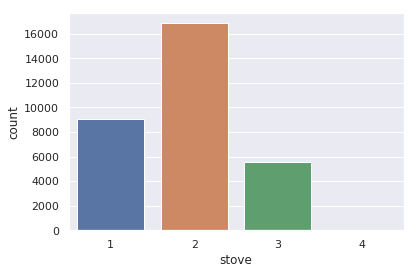

In [503]:
sns.countplot(x='stove',data=train)

## 10. Internet

In [0]:
for dataset in train_test_data:
    dataset['freeusage'] = dataset['Internet'].str.extract('(インターネット使用料無料)')
    dataset['cable'] = dataset['Internet'].str.extract('(有線放送)')
    dataset['csantenna'] = dataset['Internet'].str.extract('(CSアンテナ)')
    dataset['catv'] = dataset['Internet'].str.extract('(CATV)')
    dataset['opticalfiber'] = dataset['Internet'].str.extract('(光ファイバー)')
    dataset['internetcompatible'] = dataset['Internet'].str.extract('(インターネット対応)')
    dataset['bsantenna'] = dataset['Internet'].str.extract('(BSアンテナ)')
    dataset['highspeed'] = dataset['Internet'].str.extract('(高速インターネット)')





In [0]:
for dataset in train_test_data:
    dataset['freeusage'] = dataset['freeusage'].apply(lambda x: True if x == 'インターネット使用料無料' else False)
    dataset['cable'] = dataset['cable'].apply(lambda x: True if x == '有線放送' else False)
    dataset['csantenna'] = dataset['csantenna'].apply(lambda x: True if x == 'CSアンテナ' else False)
    dataset['catv'] = dataset['catv'].apply(lambda x: True if x == 'CATV' else False)
    dataset['opticalfiber'] = dataset['opticalfiber'].apply(lambda x: True if x == '光ファイバー' else False)
    dataset['internetcompatible'] = dataset['internetcompatible'].apply(lambda x: True if x == 'インターネット対応' else False)
    dataset['bsantenna'] = dataset['bsantenna'].apply(lambda x: True if x == 'BSアンテナ' else False)
    dataset['highspeed'] = dataset['highspeed'].apply(lambda x: True if x == '高速インターネット' else False)

## 11. Facility

## 12. Surround

In [0]:
for dataset in train_test_data:
    dataset['rentalvideo'] = dataset['Surround'].str.extract('(レンタルビデオ)')
    dataset['park'] = dataset['Surround'].str.extract('(公園)')
    dataset['drugstore'] = dataset['Surround'].str.extract('(ドラッグストア)')
    dataset['library'] = dataset['Surround'].str.extract('(図書館)')
    dataset['primaryschool'] = dataset['Surround'].str.extract('(小学校)')
    dataset['hospital'] = dataset['Surround'].str.extract('(病院)')
    dataset['department'] = dataset['Surround'].str.extract('(デパート)')
    dataset['generalhospital'] = dataset['Surround'].str.extract('(総合病院)')
    dataset['monthlyparkinglot'] = dataset['Surround'].str.extract('(月極駐車場)')
    dataset['restaurant'] = dataset['Surround'].str.extract('(飲食店)')
    dataset['school'] = dataset['Surround'].str.extract('(学校)')
    dataset['konbini'] = dataset['Surround'].str.extract('(コンビニ)')
    dataset['bank'] = dataset['Surround'].str.extract('(銀行)')
    dataset['cleaning'] = dataset['Surround'].str.extract('(クリーニング)')
    dataset['kindergarten'] = dataset['Surround'].str.extract('(幼稚園・保育園)')
    dataset['coinparking'] = dataset['Surround'].str.extract('(コインパーキング)')
    dataset['univ'] = dataset['Surround'].str.extract('(大学)')
    dataset['supermarket'] = dataset['Surround'].str.extract('(スーパー)')
    dataset['postoffice'] = dataset['Surround'].str.extract('(郵便局)')



In [0]:
for dataset in train_test_data:
    dataset['rentalvideo'] = dataset['rentalvideo'].apply(lambda x: True if x == 'レンタルビデオ' else False)
    dataset['park'] = dataset['park'].apply(lambda x: True if x == '公園' else False)
    dataset['drugstore'] = dataset['drugstore'].apply(lambda x: True if x == 'ドラッグストア' else False)
    dataset['library'] = dataset['library'].apply(lambda x: True if x == '図書館' else False)
    dataset['primaryschool'] = dataset['primaryschool'].apply(lambda x: True if x == '小学校' else False)
    dataset['hospital'] = dataset['hospital'].apply(lambda x: True if x == '病院' else False)
    dataset['department'] = dataset['department'].apply(lambda x: True if x == 'デパート' else False)
    dataset['generalhospital'] = dataset['generalhospital'].apply(lambda x: True if x == '総合病院' else False)
    dataset['monthlyparkinglot'] = dataset['monthlyparkinglot'].apply(lambda x: True if x == '月極駐車場' else False)
    dataset['restaurant'] = dataset['restaurant'].apply(lambda x: True if x == '飲食店' else False)
    dataset['school'] = dataset['school'].apply(lambda x: True if x == '学校' else False)
    dataset['konbini'] = dataset['konbini'].apply(lambda x: True if x == 'コンビニ' else False)
    dataset['bank'] = dataset['bank'].apply(lambda x: True if x == '銀行' else False)
    dataset['cleaning'] = dataset['cleaning'].apply(lambda x: True if x == 'クリーニング' else False)
    dataset['kindergarten'] = dataset['kindergarten'].apply(lambda x: True if x == '幼稚園・保育園' else False)
    dataset['coinparking'] = dataset['coinparking'].apply(lambda x: True if x == 'コインパーキング' else False)
    dataset['univ'] = dataset['univ'].apply(lambda x: True if x == '大学' else False)
    dataset['supermarket'] = dataset['supermarket'].apply(lambda x: True if x == 'スーパー' else False)
    dataset['postoffice'] = dataset['postoffice'].apply(lambda x: True if x == '郵便局' else False)

## 14. Parking

In [0]:
for dataset in train_test_data:
    dataset['bikeparking'] = dataset['Parking'].str.extract('(駐輪場)')
    dataset['carparking'] = dataset['Parking'].str.extract('(駐車場)')
    dataset['motorparking'] = dataset['Parking'].str.extract('(バイク置き場)')

In [0]:
for dataset in train_test_data:
    dataset['bikeparking'] = dataset['bikeparking'].apply(lambda x: True if x == '駐輪場' else False)
    dataset['carparking'] = dataset['carparking'].apply(lambda x: True if x == '駐車場' else False)
    dataset['motorparking'] = dataset['motorparking'].apply(lambda x: True if x == 'バイク置き場' else False)


## 15. Material

In [510]:
train['Material'].value_counts()

RC（鉄筋コンクリート）                   17504
木造                              5512
鉄骨造                             3725
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: Material, dtype: int64

In [0]:
for dataset in train_test_data:
    dataset['concrete'] = dataset['Material'].str.extract('(RC（鉄筋コンクリート）|鉄骨造|SRC（鉄骨鉄筋コンクリート）|'
                                                          '軽量鉄骨|ALC（軽量気泡コンクリート）|'
                                                          'その他|PC（プレキャスト・コンクリート（鉄筋コンクリート））|'
                                                          'HPC（プレキャスト・コンクリート（重量鉄骨））|ブロック)')
    dataset['wooden'] = dataset['Material'].str.extract('(木造)')

In [0]:
for dataset in train_test_data:
    dataset['concrete'] = dataset['concrete'].apply(lambda x: True if x == 'RC（鉄筋コンクリート）|鉄骨造|SRC（鉄骨鉄筋コンクリート）|'
                                                          '軽量鉄骨|ALC（軽量気泡コンクリート）|'
                                                          'その他|PC（プレキャスト・コンクリート（鉄筋コンクリート））|'
                                                          'HPC（プレキャスト・コンクリート（重量鉄骨））|ブロック' else False)
    dataset['wooden'] = dataset['wooden'].apply(lambda x: True if x == '木造' else False)

## 16. Contract


In [0]:
for dataset in train_test_data:
    #dataset['Contract'] = dataset['Contract'].str.extract('([0-9]*ヶ月)')
    dataset['Contract'] = dataset['Contract'].str.replace('2019年', '0年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2020年', '1年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2021年', '2年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2022年', '3年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2023年', '4年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2024年', '5年', regex=True)
    

In [0]:
for dataset in train_test_data:
    dataset['YearContract'] = dataset['Contract'].str.extract('([0-9]*年間)')
    dataset['YearContract'] = dataset['YearContract'].str.extract('([0-9]*)').fillna('2').astype(int)
    dataset['MonthContract'] = dataset['Contract'].str.extract('([0-9]*ヶ月)')
    dataset['MonthContract'] = dataset['MonthContract'].str.extract('([0-9]*)').fillna('0').astype(int)
    dataset['MonthContract'] = dataset['YearContract']*12+dataset['MonthContract']
    dataset['fixedterm'] = dataset['Contract'].str.extract('(定期借家)')
    dataset['fixedterm'] = dataset['fixedterm'].apply(lambda x: True if x == '定期借家' else False)
    dataset['metter'] = dataset['Surround'].str.extract('([0-9]*m)')
    dataset['metter'] = dataset['metter'].str.extract('([0-9]*)').fillna('350').astype(int)


In [515]:
train['MonthContract'].value_counts()

24     30704
60       244
36       244
12       157
48        64
26        11
72         9
120        7
30         7
84         4
33         3
34         2
31         2
264        2
32         2
180        1
25         1
27         1
28         1
144        1
29         1
Name: MonthContract, dtype: int64

In [516]:
train['MonthContract'].isnull().sum()

0

In [0]:
facility_type = train['Facility'].dropna().str.split('\t').sum()
facility_type = [n.replace('／', '') for n in facility_type]
facility_type = list(set(facility_type))

In [0]:
facility_type = facility_type[1:]

In [0]:
def one_hot(arr,col):
  for i in arr:
    train[i] = (train[col].str.find(i)!=-1)
    test[i] = (test[col].str.find(i)!=-1)

In [0]:
one_hot(facility_type,'Facility')

In [0]:
train = train.drop(['2stovetops','3stovetops','1stovetop','morethan4stoves','Location','id','Access','Type','Floor','Bath','Kitchen','Internet','Facility','Surround','Parking','Age','Contract'],axis=1)


In [0]:
test = test.drop(['2stovetops','3stovetops','1stovetop','morethan4stoves','Location','id','Access','Type','Floor','Bath','Kitchen','Internet','Facility','Surround','Parking','Age','Contract'],axis=1)


In [523]:
train.head(1)

Rent Direction   Area      Material City Station  Line  MinWalk  MinBus  \
0  75000        南東  20.01  RC（鉄筋コンクリート）   北区     西巣鴨  都営三田        4       0   

   StationCount  LineCount  R  K  L  D  S  NewConstr  Year  Month  FloorTh  \
0             3          3  1  1  0  0  0      False     9    117        1   

   FloorNum  UndergroundTh  UndergroundNum  House  warmseat  shower  dryer  \
0        12              0               0  False      True    True   True   

   bathtoilet  memorial  washstand  dressing toilet  bath  gasstove  \
0        True     False      False     False  専用トイレ  専用バス      True   

   systemkitchen  hotwatersupply  separatekitchen     IH  fridge  \
0           True            True            False  False   False   

   installedstove  counterkitchen  Lshapekitchen  unknown  electricstove  \
0           False           False          False    False          False   

   stove  freeusage  cable  csantenna  catv  opticalfiber  internetcompatible  \
0      2      False  False       True  True         False                True   

   bsantenna  ...  postoffice  bikeparking  carparking  motorparking  \
0       True  ...        True         True       False         False   

   concrete  wooden  YearContract  MonthContract  fixedterm  metter   汲み取り  \
0     False   False             2             24      False     495  False   

    床下収納  クッションフロア  二重サッシ  ルーフバルコニー    床暖房  エアコン付  洗濯機置場なし     井戸     冷房  \
0  False     False  False     False  False   True    False  False  False   

   公営水道  トランクルーム  水道その他  バリアフリー  二世帯住宅    専用庭   ガス暖房  ロフト付き  バルコニー    浄化槽  \
0  True    False  False   False  False  False  False  False   True  False   

   都市ガス  ウォークインクローゼット  ペアガラス    下水  タイル張り    地下室  フローリング  敷地内ごみ置き場  室外洗濯機置場  \
0  True         False  False  True  False  False    True      True    False   

   エレベーター    防音室  ガスその他   2面採光  シューズボックス  排水その他   3面採光   石油暖房     出窓  オール電化  \
0    True  False  False  False      True  False  False  False  False  False   

   室内洗濯機置場  24時間換気システム  プロパンガス  
0     True       False   False  

[1 rows x 123 columns]

In [0]:
def makeCountFull(train, test, categorical_features=None, report=True):
    add_cols = categorical_features
    if report:
        print('add_cols: ', add_cols)
    for add_col in add_cols:
        train[add_col + '_le'] = train[add_col].map(pd.concat([train[add_col], test[add_col]], ignore_index=True).value_counts(dropna=False))
        test[add_col + '_le'] = test[add_col].map(pd.concat([train[add_col], test[add_col]], ignore_index=True).value_counts(dropna=False))
    return train, test


In [525]:
from sklearn.preprocessing import LabelEncoder
cat_features = ['Direction','Material','City','Station','Line']
train, test = makeCountFull(train, test, cat_features)
cat_cols = ['Direction','Material','City','Station','Line']
for col in cat_cols:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    le = LabelEncoder()
    le.fit(list(train[col])+list(test[col]))
    train[col] = le.transform(train[col])
    test[col]    = le.transform(test[col])    
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
    train = train.drop(col,axis=1)
    test = test.drop(col,axis=1)


add_cols:  ['Direction', 'Material', 'City', 'Station', 'Line']


In [527]:
train.head(2)

Rent   Area  MinWalk  MinBus  StationCount  LineCount  R  K  L  D  S  \
0  75000  20.01        4       0             3          3  1  1  0  0  0   
1  76000  16.50        5       0             3          3  1  0  0  0  0   

   NewConstr  Year  Month  FloorTh  FloorNum  UndergroundTh  UndergroundNum  \
0      False     9    117        1        12              0               0   
1      False    44    538        5        10              0               0   

   House  warmseat  shower  dryer  bathtoilet  memorial  washstand  dressing  \
0  False      True    True   True        True     False      False     False   
1  False      True    True  False       False     False      False     False   

  toilet  bath  gasstove  systemkitchen  hotwatersupply  separatekitchen  \
0  専用トイレ  専用バス      True           True            True            False   
1  専用トイレ  バスなし      True           True            True            False   

      IH  fridge  installedstove  counterkitchen  Lshapekitchen  unknown  \
0  False   False           False           False          False    False   
1  False   False           False           False          False    False   

   electricstove  stove  freeusage  cable  csantenna   catv  opticalfiber  \
0          False      2      False  False       True   True         False   
1          False      1      False  False      False  False         False   

   internetcompatible  bsantenna  highspeed  rentalvideo   park  drugstore  \
0                True       True      False        False   True       True   
1                True      False      False        False  False      False   

   library  ...  wooden  YearContract  MonthContract  fixedterm  metter  \
0    False  ...   False             2             24      False     495   
1    False  ...   False             2             24      False    1283   

    汲み取り   床下収納  クッションフロア  二重サッシ  ルーフバルコニー    床暖房  エアコン付  洗濯機置場なし     井戸  \
0  False  False     False  False     False  False   True    False  False   
1  False  False     False  False     False  False   True    False  False   

      冷房   公営水道  トランクルーム  水道その他  バリアフリー  二世帯住宅    専用庭   ガス暖房  ロフト付き  バルコニー  \
0  False   True    False  False   False  False  False  False  False   True   
1  False  False    False  False   False  False  False  False  False   True   

     浄化槽   都市ガス  ウォークインクローゼット  ペアガラス     下水  タイル張り    地下室  フローリング  敷地内ごみ置き場  \
0  False   True         False  False   True  False  False    True      True   
1  False  False         False  False  False   True  False    True      True   

   室外洗濯機置場  エレベーター    防音室  ガスその他   2面採光  シューズボックス  排水その他   3面採光   石油暖房     出窓  \
0    False    True  False  False  False      True  False  False  False  False   
1    False    True  False  False  False      True  False  False  False  False   

   オール電化  室内洗濯機置場  24時間換気システム  プロパンガス  Direction_le  Material_le  City_le  \
0  False     True       False   False          6150        34809     2061   
1  False     True       False   False         23254         7494     2532   

   Station_le  Line_le  
0         216     2609  
1         370     2719  

[2 rows x 123 columns]

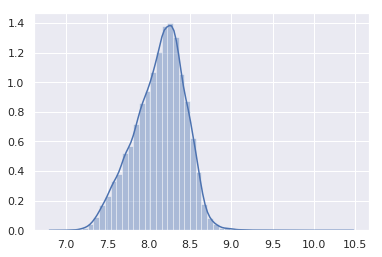

In [528]:
sns.distplot(np.log1p(train['Rent']/train['Area']))


In [0]:
train.to_csv('train.csv')
test.to_csv('test.csv')